# Foundations of Data Science TA team
## Homework 1 - Part 2
##### released: 25/02/2024; due date: 16/03/2024 (23:59)

Please provide your solutions by filling in your code to this jupyter notebook.
Lines where you should fill in your solutions are marked with "# your solution". You must replace the "None" in these lines with your
code. Further, you need to write some additional lines on your own as necessary.

In [1]:
# Import all necessary libraries 

import numpy as np # version==2.2
import pandas as pd # version==2.2
import matplotlib.pyplot as plt # version==3.10
import seaborn as sns # version==0.13
import warnings
warnings.filterwarnings("ignore")

<h3 style="color:rgb(146, 0, 0)"> IMPORTANT NOTE: Please make sure that the final submission notebooks runs as expected if you click <code> Run All </code>. </h3> 

##### The skeleton code is incomplete, therefore if you run the cells it will fail. You should change `"# your solution"` values for the appropiate variable, value or function.  

## Data Exploration

**Perform the following tasks in order to load the data and get an initial overview.** 
1. Load the data and print the dimesions of the dataframe.
2. Dipslay the first five rows and all the columns of the dataframe.

In [2]:
# Load data
data = pd.read_csv("../data/data-part-2.csv") 

# Display all (actually up to 100) columns of the dataframe
pd.set_option("display.max_columns", 100)

# Print how many patients and how many variables are available
print(f"There are {data.shape[0]} patients and {data.shape[1]} variables in the dataframe.")  # your solution 

# Print the last 3 rows of the dataframe to understand its structure and variables
data[-3:]# your solution

There are 782 patients and 19 variables in the dataframe.


,Age,BMI,Sex,Height,Weight,Severity,Diagnosis,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Appendix_Diameter,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Nausea,Body_Temperature,WBC_Count,CRP,US_Performed,US_Number
779,14.992471,19.909972,female,152.0,46.0,uncomplicated,appendicitis,5.0,3.0,no,NaN,yes,no,no,37.3,14.6,2.0,yes,127.0
780,7.195072,14.295549,male,129.3,23.9,uncomplicated,appendicitis,9.0,8.0,yes,14.0,yes,no,yes,37.5,17.8,8.0,yes,128.0
781,11.509925,18.171441,male,146.5,39.0,uncomplicated,appendicitis,2.0,2.0,yes,8.0,yes,no,no,36.8,9.3,1.0,yes,129.0


### Question 1: Missing values exploration

**(a) Create a function that generates a new dataframe to hold the total number and the percentage of missing values per column.**

In [3]:
# Create the `missing values` function
def missing_values(df):
    
    # calculate the total number of missing values per column 
    total_missing = df.isnull().sum()  # your solution            
    
    # calculate the percentage of missing values per column
    percent_missing = (total_missing/(len(df)))*100  # your solution

    # create a new dataframe that holds the columns as rows, and
    missing_data_df = pd.DataFrame({      

        # the total number of missing values, and               
        "Total number missing": total_missing,   

        # the percentage of missing values as columns          
        "Percentage missing": percent_missing                   
    },
        index = df.columns
    )
    
    missing_data_df = missing_data_df.sort_values(    
        
        # by the missing values     
        by="Total number missing", 

        # with ascending order             
        ascending=True                         
    ) 

    # return the new dataframe sorted
    return missing_data_df



**(b) Calculate the number of missing values per variable and per patient.**

*Hint: Consider the transpose method of pandas.*

In [4]:
# Calculate the missing values per variable
mv_variables = missing_values(data)  # your solution

# Calculate the missing values per patient (*Check the hint!*)
mv_patients = missing_values(data.T)  # your solution

**For the scope of this homework, set the default *colorblind* palette for the visualisations**

In [5]:
sns.set_palette("colorblind")  # your solution

**(c) Visualise the missing values per variable using a `barplot` and comment on your findings.**

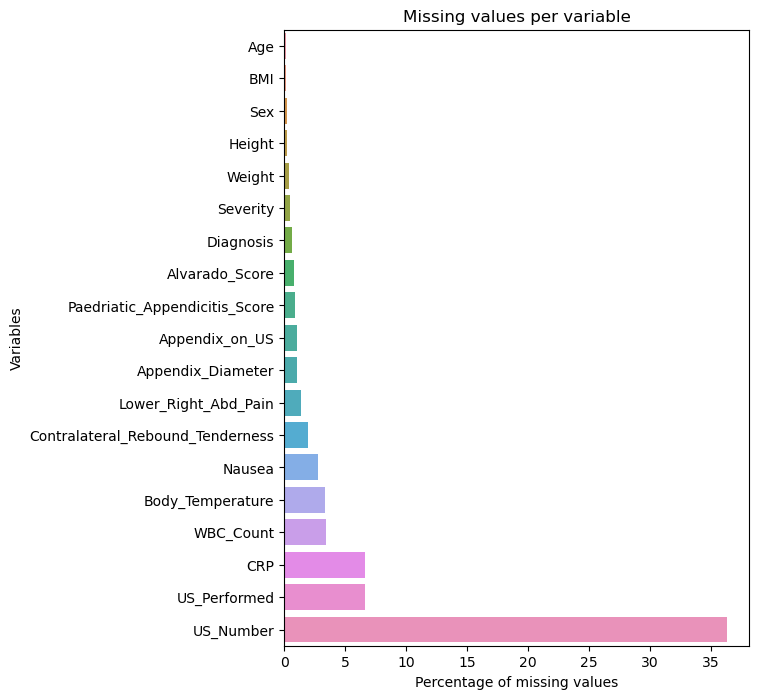

In [6]:
# Set the figure size to (6,8)
plt.figure(figsize=(6, 8))

# Create a variable to hold the barplot 
fig_mv_variables = sns.barplot(

    # Set x axis to be the percentage of missing values
    x = mv_variables["Percentage missing"],  # your solution, 
    
    # Set y axis to be the variables
    y = data.columns  # your solution
)

# Set the title and labels
fig_mv_variables.set(title="Missing values per variable", xlabel="Percentage of missing values",ylabel="Variables")  # your solution (Hint: title and labels must be given to this function as arguments)

# Save the figure in the output folder as `11c_mv_variables_barblot.png`
plt.savefig("../output/211c_mv_variables_barblot.png", bbox_inches="tight")

**(d) Visualise the top ten patients that have the most missing variables using a `barplot`. What do you observe?**

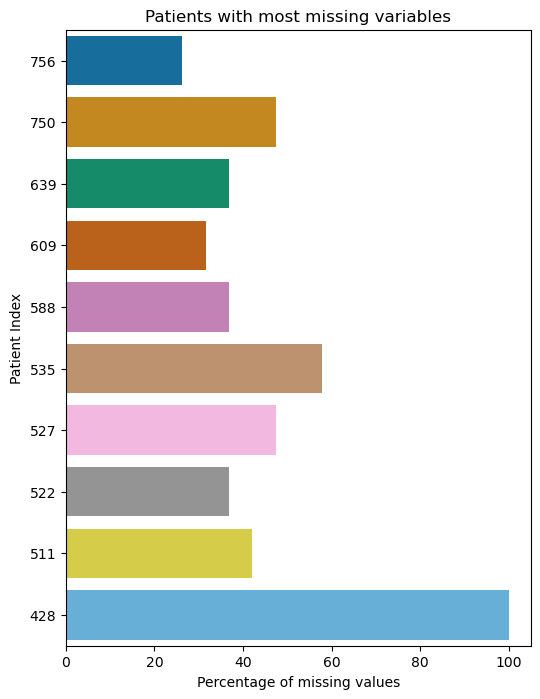

In [7]:
# Define the subset of the dataset that you want to plot
mv_patients_to_plot =  mv_patients.nlargest(10,"Total number missing") # your solution

# Transform the index of the dataset to `str`  
mv_patients_to_plot.index = mv_patients_to_plot.index.astype(str) # your solution (.index wurde noch hinzugefügt)
mv_patients_to_plot = mv_patients_to_plot.sort_index()
# Set the figure size to (6, 8)
plt.figure(figsize=(6, 8))

# Create a variable to hold the barplot 
fig_mv_patients = sns.barplot(

    # Set x axis to be the percentage of missing values
    x = mv_patients_to_plot["Percentage missing"],  # your solution
    
    # Set y axis to be the variables (Frage: ist Patienten mit variables gemeint?)
    y = mv_patients_to_plot.index,  # your solution
    orient="h",
    order= sorted(mv_patients_to_plot.index, reverse=True)  # your solution (Hint: Seaborn automatically sorts values by index; to overwrite this behavior one must explicitly provide an index, e.g. something of the form df.index)
)

# Set the title and labels
fig_mv_patients.set(title="Patients with most missing variables", xlabel="Percentage of missing values",ylabel="Patient Index")  # your solution (Hint: Title and labels can be passed to this function as arguments)

# Save the figure in the output folder as `11d_mv_patients_barblot.png`
plt.savefig("../output/211d_mv_patients_barblot.png", bbox_inches="tight")


## Question 2

**Visualise the `age` and the `height` of the patients separated by gender, as subplots of the same figure, using the appropriate graph type. You should create a figure of size (8, 10) that contains the subplot of age in the top row and the subplot of height in the bottom row.  Justify your choice and comment on your findings. Are your findings in alignment with your expectations?**

*Hint: Think of the data types to choose the appropriate graph and the study population to comment on the findings. Note: More than one graph types may be appropriate.*

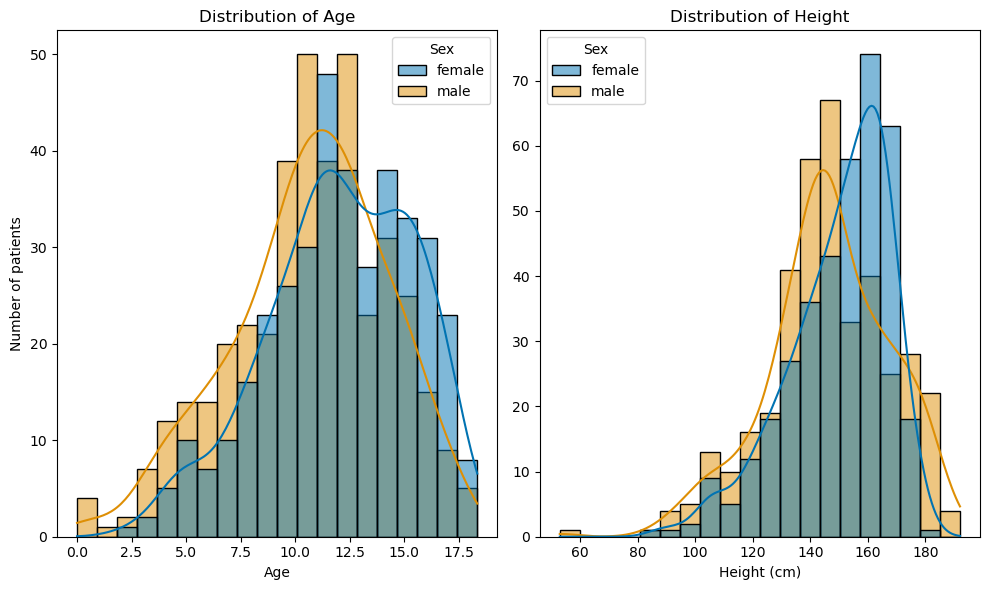

In [8]:
# Create a figure with two subplots (one on top and one on bottom / two rows, one column) 
# that has a size of (8,10)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6)) # your solution (Hint: You need a function from matplotlib.pyplot, which returns both a figure and axes)

# subplot 1: Age graph
# your solution (Hint: What plot type from seaborn would be suited to display age distributions?)   
subplot_age = sns.histplot(
data=data,
x = "Age",
hue="Sex",
ax=axes[0],
kde=True,
alpha=0.5,
bins=20
)

# Set the title and labels of the age subplot
axes[0].set(
    title="Distribution of Age",
    xlabel="Age",
    ylabel="Number of patients")

# subplot 2: Height graph
# your solution
subplot_age = sns.histplot(
data=data,
x = "Height",
hue="Sex",
ax=axes[1],
kde=True,
alpha=0.5,
bins=20
)
# Set the title and labels of the height subplot
axes[1].set(
    title="Distribution of Height",
    xlabel="Height (cm)",
    ylabel=None
)
# Adjust layout
plt.tight_layout()

# Save the figure in the output folder as `12_age_height_graph.png`
plt.savefig("../output/212_age_height_graph.png", bbox_inches="tight")

## Question 3

**Visualise `Severity`, and `Diagnosis`, as subplots in the same figure, using the appropriate graph type. You should create a figure of size (10, 6) that contains the subplot of Severity on left and the subplot of Diagnosis on the right. Justify your choice and comment on your findings.**

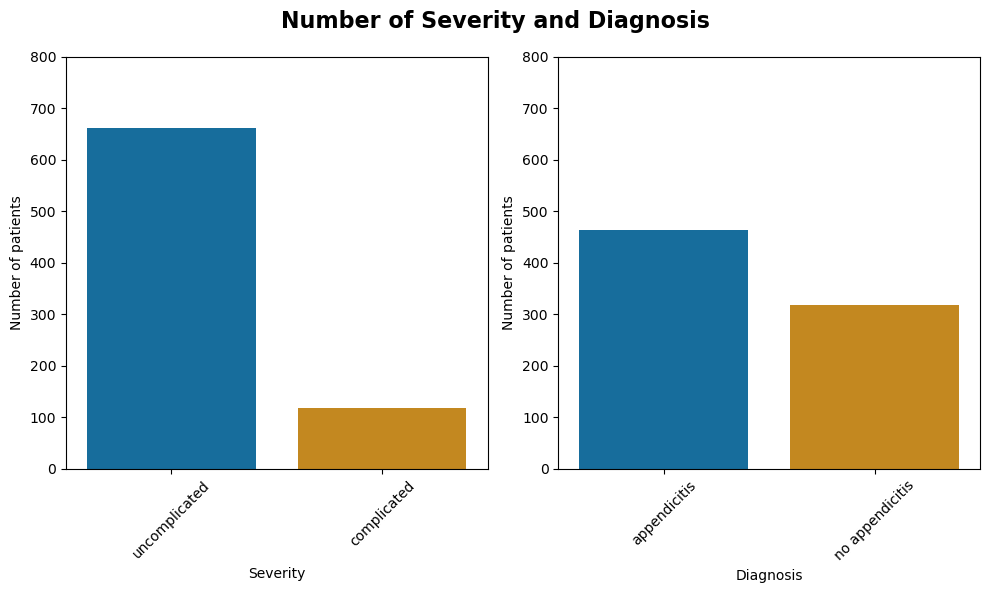

In [9]:
# Create a figure with two subplots (one on the left and one the right / one row, two columns) 
# that has a size of (10,6) using a for loop
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6)) 

# Iterate over the target columns
for i, column in enumerate(data[["Severity", "Diagnosis"]].columns): #enumerate fügt noch eine column mit index hinzu
    
    # Plot the subplot
    # your solution
    
    count_plot= sns.countplot(
        data,
        ax=axes[i],
        x=column
        
    )
    count_plot.set(ylabel="Number of patients")
    # Rotate x label to 45 degrees
    axes[i].tick_params(axis="x", rotation=45)  # your solution (Hint: You need to pass the correct axis label and the amount of rotation to this function)
    
    # Define the scale of the y label 
    axes[i].set_ylim(0,800)


# Set the title
# your solution
fig.suptitle("Number of Severity and Diagnosis", fontsize=16, fontweight="bold")


# Adjust layout
plt.tight_layout()

# Save the figure in the output folder as `13_diagnosis_severity_graph.png`
plt.savefig("../output/213_diagnosis_severity_graph.png", bbox_inches="tight")

## Data Understanding

### Question 1

**Visualize the `Body_Temperature` by `Diagnosis` for all patients, using a `histogram`, a `boxplot` and a `violin plot`. Present the three graphs as subplots in the same figure. You should create a figure of size (10, 12) that contains the three subplots in subsequent rows. Comment on your findings. Are there any outliers? Can they be explained?**

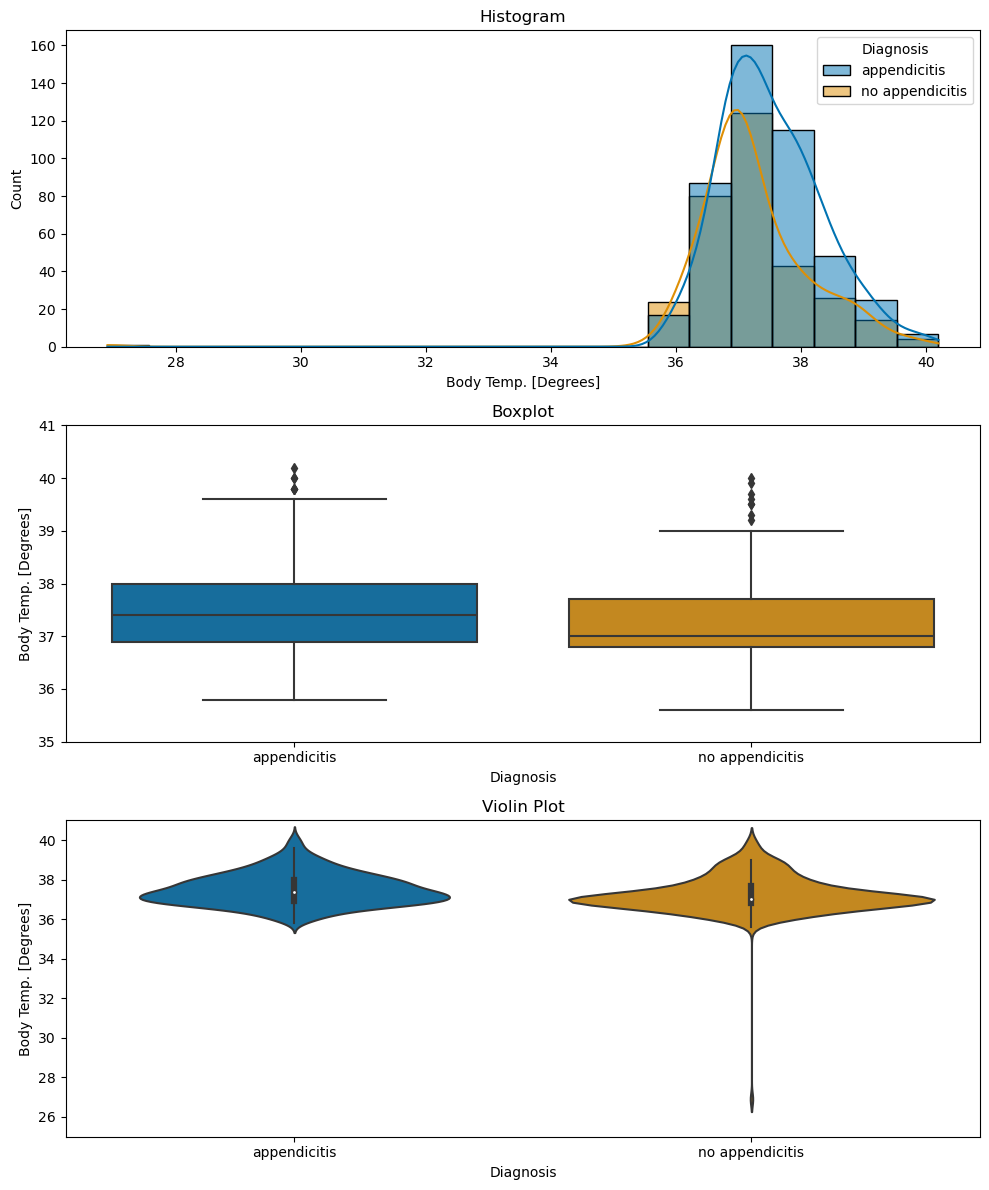

In [10]:
# Create a figure with three subplots (three rows, one column) with a size of (10, 12)
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# subplot 1: Plot a histogram
sns.histplot(

    # Define the data
    data=data, # your solution

    # Define the variable that will be plotted
    x="Body_Temperature",  # your solution

    # Define the number of bins (20) that will be plotted
    bins=20,  # your solution

    # Include a kde plot
    # your solution (Hint: this can be done with the kde argument; KDE stands for Kernel Density Estimation)
    kde=True,
    # Set the position of the subplot
    ax=axes[0], 

    # Color the patients by Diagnosis
    # your solution (Hint: this can be done with the hue argument)
    hue= "Diagnosis"
)

# Set the title to "Histogram" and print the correct x label
axes[0].set(title="Histogram",xlabel="Body Temp. [Degrees]")  # your solution (Hint: You can pass the title and xlabel as arguments to this function) 

# subplot 2: Plot a boxplot
sns.boxplot(

    # Define the variable that will be plotted
    data=data,
    x="Diagnosis",
    y="Body_Temperature",
    ax=axes[1],
    
    

    # your solution

    # Set the position of the subplot
    # your solution

    # Color the patients by Diagnosis
    # your solution

)

# Set the title to "Boxplot" and print the correct x label
axes[1].set(title="Boxplot",ylabel="Body Temp. [Degrees]") # your solution (Hint: You can pass the title and xlabel as arguments to this function) 
axes[1].set_ylim(35, 41)
# subplot 3: Plot a violin plot
sns.violinplot(
    data=data,
    # Define the variable that will be plotted
    # your solution
    x="Diagnosis",
    y="Body_Temperature",
    ax=axes[2]
    # Set the position of the subplot
    # your solution

    # Color the patients by Diagnosis
    # your solution
)
axes[2].set_ylim(25, 41)
axes[2].set(title="Violin Plot",ylabel="Body Temp. [Degrees]")
# Set the title "Violin Plot" and print the correct x label
# your solution (Hint: You can pass the title and xlabel as arguments to this function) 

# Adjust layout to a tight_layout
plt.tight_layout()
# you solution

# Save the figure in the output folder as `21_body_temperature.png`
plt.savefig("../output/221_body_temperature.png", bbox_inches="tight")

### Question 2

**Visualize the following list of numerical variables using `boxplots`. Present the results as subplots in the same figure. You should create a figure  of size (12,12 )with 2 subplots per row. Comment on your findings. Which variable has the most outliers? Is there a valid explanation for them?**

In [11]:
# Create a list of tuples to hold the numerical variables and their units
units = [
    ("BMI", "kg/m²"),            
    ("Weight", "kg"),                 
    ("Body_Temperature", "°C"),       
    ("WBC_Count", "10^9/L"),          
    ("CRP", "mg/L"),                  
    ("Appendix_Diameter", "mm")       
]


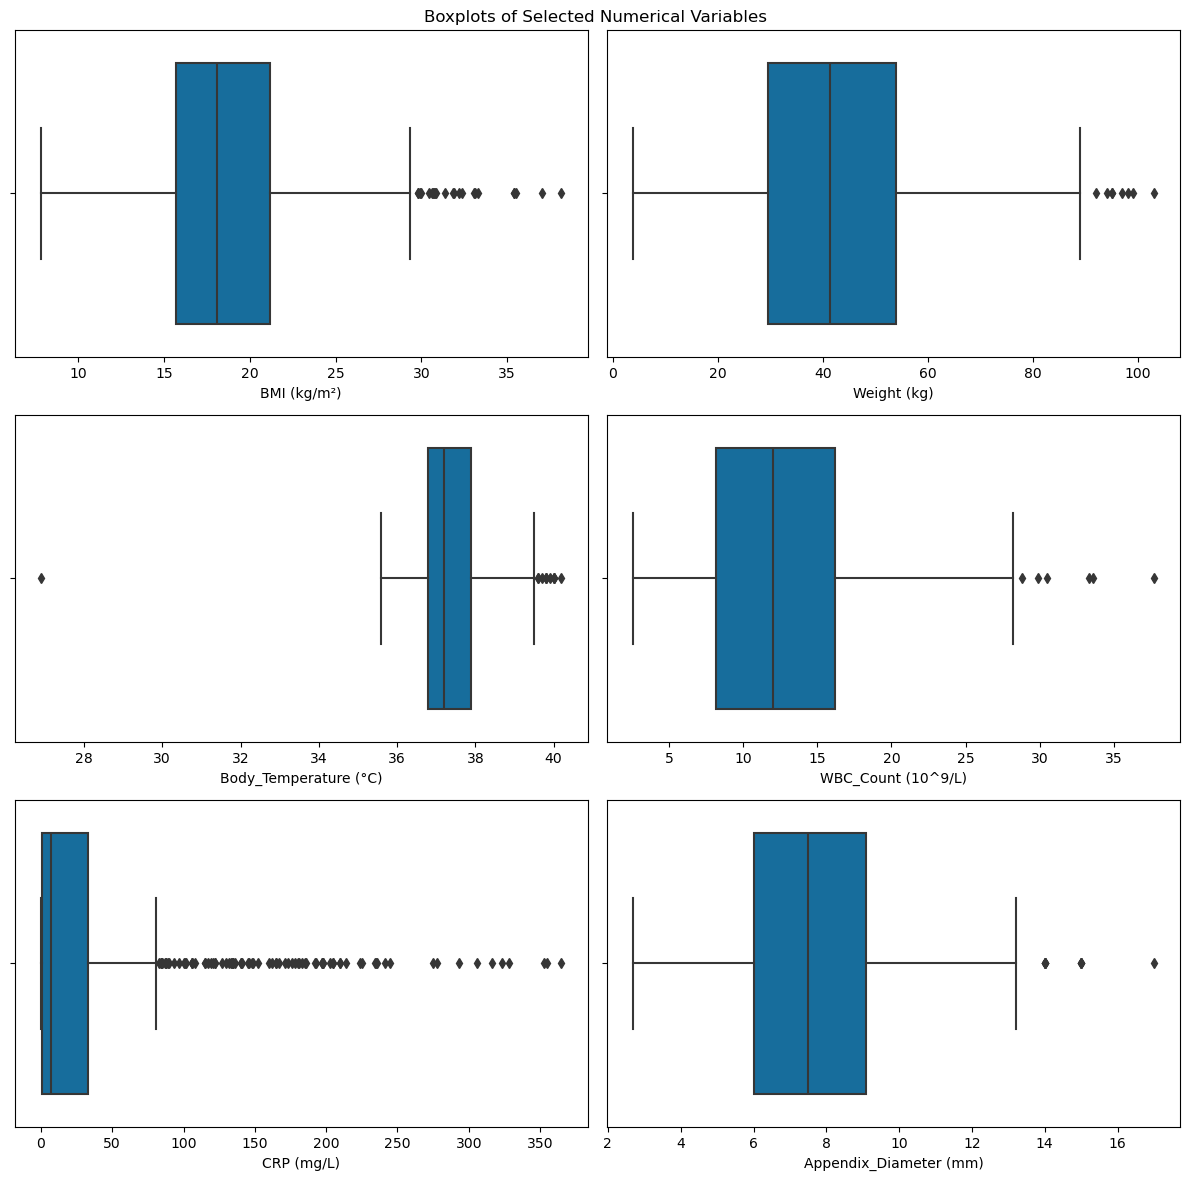

In [12]:
# Create a figure with the subplots (2 subplots per row) and set the size of figure to (12,12)
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()

# Iterate over each variable and its units and create boxplots
for i, (variable, unit) in enumerate(units):

    # create the boxplot
    sns.boxplot(
        data=data,
        # Define the column to plot
        x=variable, 

        # Set the position of the subplot
        ax=axes[i]
    )

    # Set the x label of the subplot
    axes[i].set(
        xlabel=f"{variable} ({unit})"
)

# Set the title
plt.suptitle("Boxplots of Selected Numerical Variables")

# Adjust layout
plt.tight_layout()

# Save the figure in the output folder as `22_numerical_boxplots.png`
plt.savefig("../output/222_numerical_boxplots.png", bbox_inches="tight")

## Explore potential risk factors

### Question 1

**Visualize `CRP` against `WBC_Count` by `Diagnosis` and `Severity` using `scatterplot` graphs. Present the two graphs as subplots in the same figure. You should create a figure of size (12,6) with one subplot on the right and the other on the left.** 

*Hint: The data points on each graph should have different colors based on Diagnosis and Severity respectively.* 

*Note: In most cases, appendicitis is presented with increased inflammation markers, such as CRP and WBC count.*

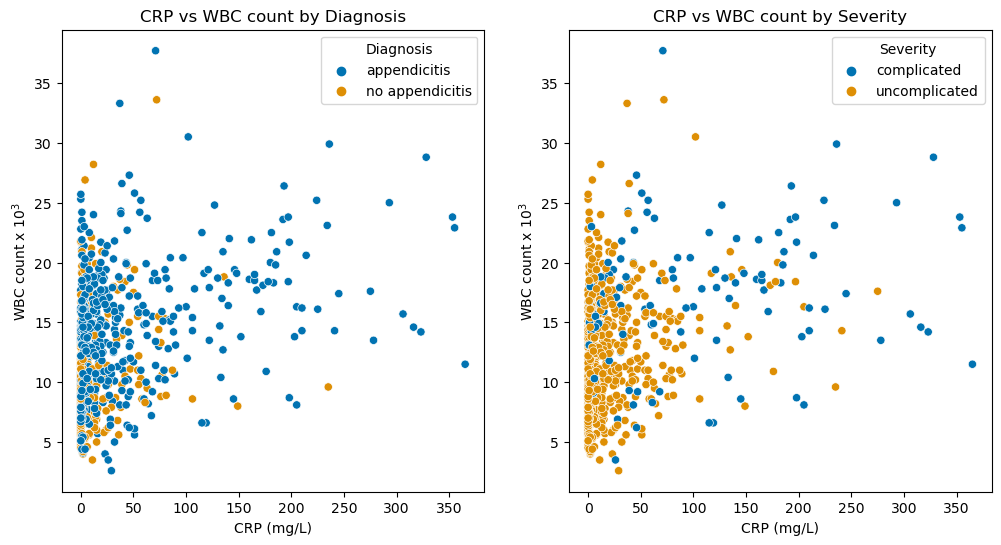

In [13]:
# Set the target outcomes
outcomes = ["Diagnosis", "Severity"]

# Set the order of the target outcome values
outcome_order = [("appendicitis", "no appendicitis"), ("complicated", "uncomplicated")]

# Create a figure with two subplots with a size of (12,6)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# each target outcome and ordered target outcome values
for i, (outcome, order) in enumerate(zip(outcomes, outcome_order)):

    # Create a scatterplots
    sns.scatterplot(
        
        # Define the dataset
        data=data, 
        
        # Set 'CRP' to be plotted on x axis
        x="CRP",  # your solution 
        
        # Set 'WBC_Count' to be plotted on y axis
        y="WBC_Count", 
        
        # Color the patients based on each outcome
        hue=outcome,  # your solution
        
        # Select the coloring in accordance to the order indicated in "outcome_order"
        hue_order=order, 
        
        # Set the position of the subplot
        ax=axes[i]
    )

    # Set the title and labels 
    axes[i].set(
        title=f"CRP vs WBC count by {outcome}",  
        xlabel="CRP (mg/L)",
        ylabel="WBC count x 10$^3$"
    )

# Save the figure in the output folder as `31_scatterplot.png`
plt.savefig("../output/231_scatterplot.png", bbox_inches="tight")   

### Question 2

**Create a new variable combining the values of `Contralateral_Rebound_Tenderness` and `Lower_Right_Abd_Pain`. This new variable represents the existence or not of abdominal irritation symptoms and you may name it `Contralateral_Rebound_Tenderness-Lower_Right_Abd_Pain`. Then, visualize the pairwise distribution of counts for `Diagnosis` against this new variable using a heatmap. Comment on your findings.**

*Hint: Consider the pandas `crosstab` method for creating the new variable.* 

*Note: Pain in the lower right abdomen is a common symptom of appendicitis and contralateral rebound tenderness is indicative of inflammation of the abdomen (more specifically in the peritoneum) that can be caused by acute appendicitis among other causes.*

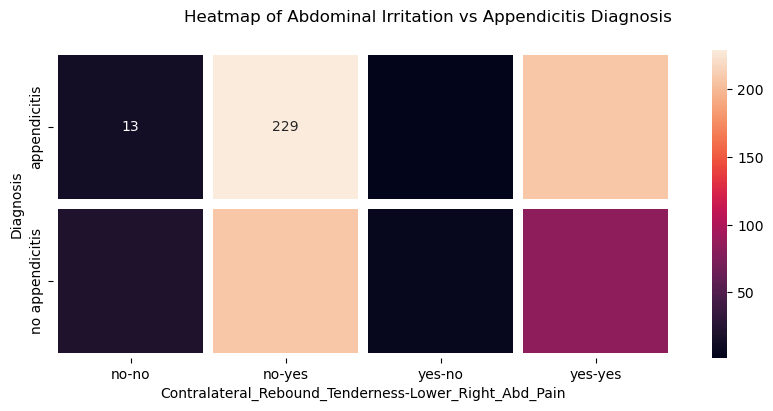

In [14]:
# Create a contingency table
contingency_table = pd.crosstab(

    # Set the index variable
    index=data["Diagnosis"], 
    
    # Set the variables based on which you will create the new variable 
    columns=[data["Contralateral_Rebound_Tenderness"],data["Lower_Right_Abd_Pain"]]
) # your solution (Hint: You need to add a second column. So far only contralateral rebound_renderness is considered but not lower right abdominal pain)

# Create a figure of size (10,4)
heatmap_figure = plt.figure(figsize=(10, 4))

# Create a heatmap including annotation and colorbar
sns.heatmap(contingency_table, annot=True, fmt='d', linewidths=6.0, cbar=True)

# Set the title
heatmap_figure.suptitle("Heatmap of Abdominal Irritation vs Appendicitis Diagnosis")

# Save the figure in the output folder as `32_heatmap.png`
plt.savefig("../output/232_heatmap.png", bbox_inches="tight") 